In [ ]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import io
import datetime
import numpy as np
import matplotlib.pyplot as plt


**GITHUBDAN KLONLAMA**

In [ ]:
!git clone https://github.com/Xeonen/TurEV-DB.git

Cloning into 'TurEV-DB'...
remote: Enumerating objects: 8795, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 8795 (delta 14), reused 0 (delta 0), pack-reused 8771
Receiving objects: 100% (8795/8795), 259.50 MiB | 27.95 MiB/s, done.
Resolving deltas: 100% (120/120), done.
Checking out files: 100% (8700/8700), done.


In [ ]:
#!npx degit Xeonen/TurEV-DB/Sound%20Source/Angry --force

In [ ]:
!ls TurEV-DB/'Sound Source'

Angry  Calm  Happy  Sad


In [ ]:
import librosa 
from librosa import display
from IPython.display import Audio, display

# **BİRAZ GÖRSELLEŞTİRME**

In [ ]:
data, sampling_rate = librosa.load('/content/TurEV-DB/Sound Source/Angry/1157_kz_acik.wav')

In [ ]:
sampling_rate

22050

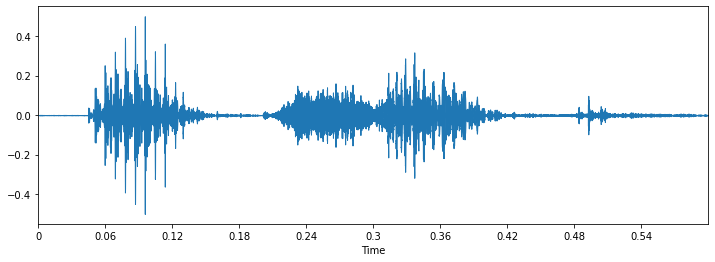

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)


In [ ]:
display(Audio('/content/TurEV-DB/Sound Source/Angry/1157_kz_algi.wav', autoplay=True))

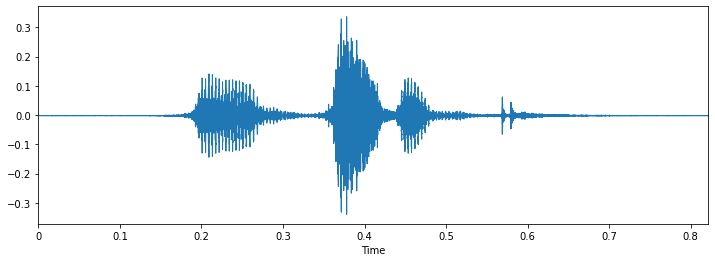

In [ ]:
data, sampling_rate = librosa.load('/content/TurEV-DB/Sound Source/Calm/1234_sk_acik.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
display(Audio('/content/TurEV-DB/Sound Source/Calm/1234_sk_acik.wav', autoplay=True))

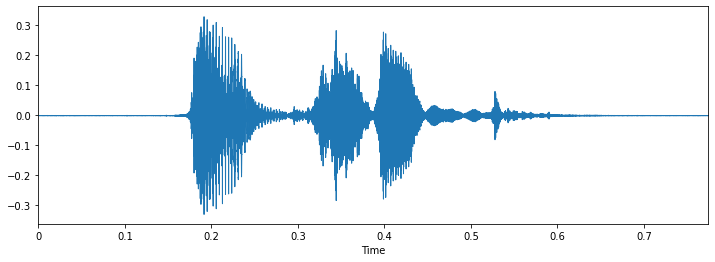

In [ ]:
data, sampling_rate = librosa.load('/content/TurEV-DB/Sound Source/Happy/1234_mt_acik.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
display(Audio('/content/TurEV-DB/Sound Source/Happy/1234_mt_acik.wav', autoplay=True))

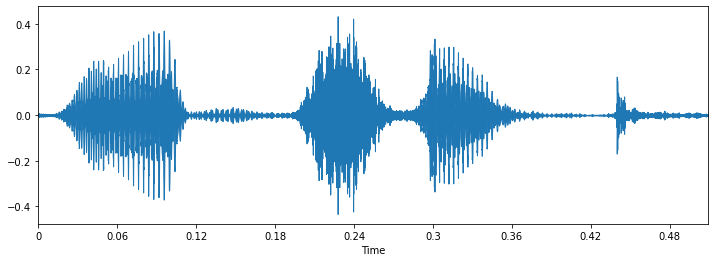

In [ ]:
data, sampling_rate = librosa.load('/content/TurEV-DB/Sound Source/Sad/1234_hl_acik.wav', sr=22456)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
sampling_rate

22456

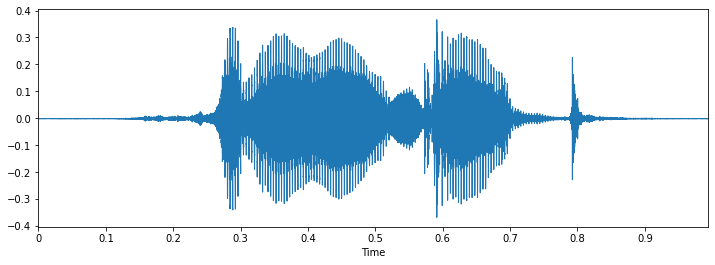

In [ ]:
data, sampling_rate = librosa.load('/content/TurEV-DB/Sound Source/Sad/1234_hl_firildak.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
sampling_rate

22050

In [ ]:
display(Audio('/content/TurEV-DB/Sound Source/Sad/1234_hl_firildak.wav', autoplay=True))

In [ ]:
%cd /content/TurEV-DB/'Sound Source'

/content/TurEV-DB/Sound Source


# DOSYALARI OKUMA

In [ ]:
!pip install spafe

# **MFCC FEATURES**

In [ ]:
path = '/content/TurEV-DB/Sound Source/'
#%cd TurEV-DB
lst_spectogram_X = []
lst_y = []
labels = ['Sad', 'Angry', 'Happy', 'Calm']

for i in labels:
  for subdir, dirs, files in os.walk(path + i):
    for file in files:
      try:       
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast',duration=None,sr=22050*2,offset=0.0)
        #freq_spect = np.abs(librosa.stft(X, n_fft=512, window='hamming', win_length=256, hop_length=128)) ** 2
        # Compute mel spectrogram
        #
        #mel_spect = librosa.feature.melspectrogram(S=freq_spect, sr=44100, n_mels=128, fmax=4000)
        specto = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        #log_mel_spectogram=np.mean(librosa.power_to_db(mel_spect))
        #lst_spectogram_X.append(log_mel_spectogram)
        lst_spectogram_X.append(specto)
        lst_y.append(i)
        #arr = log_mel_spectogram, file
        #lst_spectogram.append(arr)
      except ValueError:
        continue

In [ ]:
pd.DataFrame(lst_y, columns=['emotion']).emotion.value_counts()

Angry    487
Sad      483
Calm     408
Happy    357
Name: emotion, dtype: int64

In [ ]:
data, sampling_rate = librosa.load('/content/TurEV-DB/Sound Source/Sad/1234_hl_firildak.wav', res_type='kaiser_fast',duration=None,sr=22050*2,offset=0.0)

In [ ]:
freq_spect = np.abs(librosa.stft(data, n_fft=1024, window='hamming', win_length=256, hop_length=128)) ** 2

In [ ]:
mel_spect = librosa.feature.melspectrogram(S=freq_spect, sr=44100, n_mels=128)

In [ ]:
mel_spect = librosa.feature.melspectrogram(y=data, sr=22050)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

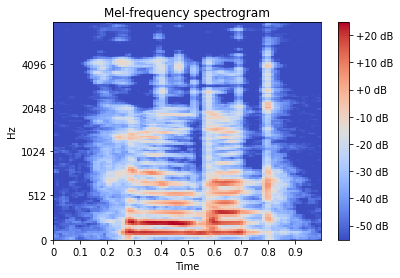

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.power_to_db(mel_spect), x_axis='time',
                         y_axis='mel', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [ ]:
librosa.power_to_db(mel_spect).shape

(128, 86)

In [ ]:
pd.DataFrame(np.mean(librosa.power_to_db(mel_spect).T, axis=0)).describe()

0
count  128.000000
mean   -39.101177
std     10.586750
min    -54.850269
25%    -46.448342
50%    -39.212952
75%    -33.604079
max     -7.964489

# **MEL SPECTROGRAM FEATURES**

In [ ]:
lst_spectogram_non_mfcc_X = []

for i in labels:
  for subdir, dirs, files in os.walk(path + i):
    for file in files:
      try:       
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast',duration=None,sr=22050*2,offset=0.0)
        #freq_spect = np.abs(librosa.stft(X, n_fft=512, window='hamming', win_length=256, hop_length=128)) ** 2
        # Compute mel spectrogram
        #
        mel_spect = librosa.feature.melspectrogram(y=X, sr=44100, n_mels=256, fmax=8000)
        #specto = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        log_mel_spectogram_non_mfcc=np.mean(librosa.power_to_db(mel_spect).T, axis=0)
        lst_spectogram_non_mfcc_X.append(log_mel_spectogram_non_mfcc)
        #lst_spectogram_X.append(specto)
        #lst_y.append(i)
        #arr = log_mel_spectogram, file
        #lst_spectogram.append(arr)
      except ValueError:
        continue

In [ ]:
np.array(lst_spectogram_non_mfcc_X).shape

(1735, 256)

# **LFCC**

In [ ]:
import scipy
from spafe.utils import vis
from spafe.features.lfcc import lfcc

In [ ]:
import scipy.io.wavfile

In [ ]:
np.asarray(lst_spectogram_X)

array([[-4.57026215e+02,  1.07968384e+02, -3.29265594e+00, ...,
         2.57563829e+00,  1.87331271e+00,  3.24234009e+00],
       [-5.02277405e+02,  7.04329910e+01, -1.19318161e+01, ...,
        -2.12705597e-01,  1.38318074e+00, -2.00602841e+00],
       [-4.88589539e+02,  9.92883911e+01,  2.87858334e+01, ...,
        -5.93451738e+00, -4.91900587e+00,  8.41972604e-02],
       ...,
       [-3.51567871e+02,  1.46833389e+02,  1.23138011e+00, ...,
        -1.22690272e+00, -1.15443683e+00, -5.52230978e+00],
       [-6.09407227e+02,  1.00089424e+02,  2.32821903e+01, ...,
        -6.91579103e+00, -5.40691137e+00, -5.97439241e+00],
       [-4.32713959e+02,  1.08719040e+02,  2.60658188e+01, ...,
         8.83065128e+00,  6.90604687e+00,  3.58078814e+00]], dtype=float32)

In [ ]:
#%cd TurEV-DB
lst_lfcc_X = []
#np_lst_lfcc_X = np.array()
# init input vars
num_ceps = 40
low_freq = 0
high_freq = 8000
nfilts = 60
nfft = 512
dct_type = 2,
use_energy = 0,
lifter = 5
normalize = 1

for i in labels:
  for subdir, dirs, files in os.walk(path + i):
    for file in files:
      try:       
        fs, sig = scipy.io.wavfile.read(os.path.join(subdir,file))
        lfccs = np.mean(lfcc(sig=sig,
             fs=22400,
             num_ceps=num_ceps,
             nfilts=nfilts), axis=0)
        #print(type(lfccs))
        lst_lfcc_X.append(lfccs)
      except ValueError:
        continue

In [ ]:
np.array(lst_lfcc_X).shape

(1735, 40)

# **LPC**

In [ ]:
from spafe.features.lpc import lpc, lpcc, lpc2cep

In [ ]:
#from librosa import lpc as lib_lpc

In [ ]:
sig

array([ 1,  1,  1, ..., 96, 90, 85], dtype=int16)

In [ ]:
#%cd TurEV-DB
lst_lpc_X = []
# init input vars
num_ceps = 26
low_freq = 0
high_freq = 8000
nfilts = 60
nfft = 1024
dct_type = 2,
use_energy = 0,
lifter = 5
normalize = 1

for i in labels:
  for subdir, dirs, files in os.walk(path + i):
    for file in files:
      try:
        fs, sig = scipy.io.wavfile.read(os.path.join(subdir,file))              
        lpccs = np.mean(lpcc(sig=sig,
               fs=fs,
               num_ceps=num_ceps,
               do_rasta=False),axis=0)
        lst_lpc_X.append(lpccs)
      except ValueError:
        continue



In [ ]:
lst_lpc_X

[array([-3.03685682, -2.1769211 , -0.90222398, -0.4498128 , -0.26960499,
        -0.15125678, -0.0056109 ,  0.06131673,  0.17075365,  0.23594446,
         0.27020896,  0.29785353,  0.33888068,  0.36554135,  0.39305231,
         0.41561265,  0.4204524 ,  0.43252586,  0.43424745,  0.44472521,
         0.44766866,  0.45732724,  0.45776077,  0.45772675,  0.44792126,
         0.44276743]),
 array([-3.07033341, -2.27788123, -0.98780366, -0.44925775, -0.1983308 ,
        -0.1511323 ,  0.01620556,  0.07367885,  0.16201691,  0.20871397,
         0.28839249,  0.31970955,  0.34839903,  0.36450952,  0.39634847,
         0.42514836,  0.42687193,  0.43826243,  0.44495754,  0.4590625 ,
         0.46208799,  0.47065042,  0.46345847,  0.46478416,  0.45090578,
         0.4505752 ]),
 array([-3.21301326, -2.29821039, -0.92019448, -0.44589998, -0.29104731,
        -0.1605228 , -0.01301739,  0.0958019 ,  0.18554101,  0.2445655 ,
         0.28332783,  0.31712121,  0.3573431 ,  0.37620028,  0.39618651,
     

In [ ]:
np.array(lst_lpc_X).shape

(1735, 26)

# **PLP**

In [ ]:
from spafe.features.rplp import plp, rastaplp

In [ ]:
#%cd TurEV-DB
lst_plp_X = []

for i in labels:
  for subdir, dirs, files in os.walk(path + i):
    for file in files:
      try:       
        fs, sig = scipy.io.wavfile.read(os.path.join(subdir,file))
        plps  = np.mean(plp(sig, fs=fs, num_ceps= 26), axis=0)
        lst_plp_X.append(plps)
      except ValueError:
        continue

In [ ]:
lst_plp_X

[array([ 3.65267465e+00, -3.19140760e-01, -3.17538460e-02, -2.93679297e-01,
        -5.18191841e-02, -3.19425476e-01, -1.48345273e-01, -3.60383860e-01,
         2.98077115e-02, -5.31878566e-02, -2.11286187e-02, -2.05909406e-01,
        -4.48125746e-02, -9.45233751e-02,  3.91060727e-02,  3.15799642e-02,
        -3.15467498e-02, -1.37752813e-03, -5.68871142e-02,  1.51911861e-02,
        -8.69376646e-03,  8.64414941e-02, -9.28125123e-03,  7.92402030e-02,
        -3.02325492e-02,  1.03874998e-01]),
 array([ 3.54495170e+00, -4.14004796e-01, -1.26753499e-01, -2.16387482e-01,
         1.31160161e-01, -1.89278815e-01,  5.06057480e-02, -3.07246241e-01,
        -1.77371531e-01, -2.58934674e-01, -1.40028548e-03, -9.89213369e-02,
         6.49782731e-03, -8.07121207e-02, -3.77092912e-02, -2.85114104e-02,
        -3.39821333e-02,  2.27327840e-02, -2.30516814e-02,  7.02040188e-02,
         1.75737903e-02,  7.39968358e-02, -3.32100547e-02,  7.77441359e-02,
        -2.20799448e-02,  9.05732745e-02]),


In [ ]:
np.array(lst_plp_X).shape

(1735, 26)

# **PLP RASTA**

In [ ]:
lst_plp_rasta_X = []

for i in labels:
  for subdir, dirs, files in os.walk(path + i):
    for file in files:
      try:       
        fs, sig = scipy.io.wavfile.read(os.path.join(subdir,file))
        rasta_plps  = np.mean(rastaplp(sig, fs=fs, modelorder= 25), axis=0)
        lst_plp_rasta_X.append(rasta_plps)
      except ValueError:
        continue

In [ ]:
lst_plp_rasta_X

[array([-0.44870126, -0.33633649, -0.25396143, -0.22499515, -0.205371  ,
        -0.20432067, -0.16240672, -0.1577263 , -0.11083722, -0.09888536,
        -0.08005319, -0.07948379, -0.05056548, -0.03943829, -0.01896847,
        -0.00718311, -0.00479308,  0.00689107,  0.00646614,  0.0208552 ,
         0.0161721 ,  0.03715077,  0.02346261,  0.04275899,  0.01285015,
         0.03042634]),
 array([-0.45779069, -0.35570111, -0.28222042, -0.22895252, -0.18196787,
        -0.20006216, -0.15789278, -0.16110692, -0.12805696, -0.11991328,
        -0.07398142, -0.06616016, -0.04741254, -0.0436084 , -0.02130066,
        -0.00499459, -0.00360574,  0.00787542,  0.00949814,  0.0264148 ,
         0.02316979,  0.03809074,  0.02271118,  0.03921281,  0.01016712,
         0.02754498]),
 array([-0.46629763, -0.34878571, -0.25840909, -0.22643699, -0.21815642,
        -0.21775022, -0.17097724, -0.14882811, -0.10799149, -0.09973161,
        -0.0798646 , -0.07322616, -0.04848833, -0.04292947, -0.02813999,
     

In [ ]:
np.array(lst_plp_rasta_X).shape

(1735, 26)

# boyut check

In [ ]:
np.asarray(lst_spectogram_X).shape

(1735, 40)

In [ ]:
np.asarray(lst_y).shape

(1735,)

# Categorical Encoding & Train Test Split

# DATASETLERİN VE KAREGORİLERİN OLUŞTURULMASI

In [ ]:
X= np.asarray(lst_spectogram_X)
y = np.asarray(lst_y)

In [ ]:
X_mel = np.asarray(lst_spectogram_non_mfcc_X)

In [ ]:
X_lfcc = np.array(lst_lfcc_X)

In [ ]:
X_plp = np.array(lst_plp_X)

In [ ]:
X_plp_rasta = np.array(lst_plp_rasta_X)

In [ ]:
X_lpc = np.array(lst_lpc_X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
lb = LabelEncoder()
y_new = np_utils.to_categorical(lb.fit_transform(np.ravel(y)))

In [ ]:
y_new

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=5)

In [ ]:
from sklearn.preprocessing import StandardScaler

# PCA FOR MEL

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
X_mel_scaled = scaler.fit_transform(X_mel)

In [ ]:
pca = PCA(n_components=25)
pca.fit(X_mel_scaled)
X_mel_pca = pca.transform(X_mel_scaled)

In [ ]:
pca.explained_variance_ratio_

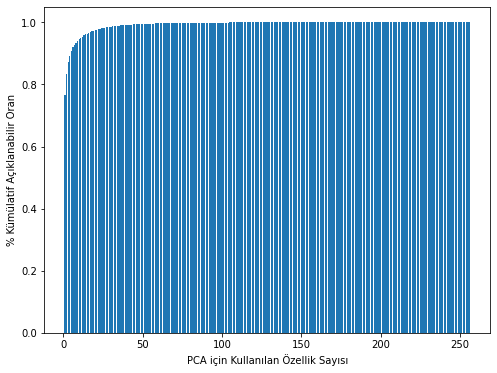

In [ ]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,257), cum_exp_var)
ax.set_xlabel('PCA için Kullanılan Özellik Sayısı')
ax.set_ylabel('% Kümülatif Açıklanabilir Oran');

In [ ]:
X_train_lfcc, X_test_lfcc, y_train_lfcc, y_test_lfcc = train_test_split(X_lfcc, y_new, test_size=0.2, random_state=5)
X_train_lpc, X_test_lpc, y_train_lpc, y_test_lpc = train_test_split(X_lpc, y_new, test_size=0.2, random_state=5)
X_train_mel, X_test_mel, y_train_mel, y_test_mel = train_test_split(X_mel, y_new, test_size=0.2, random_state=5)
X_train_plp, X_test_plp, y_train_plp, y_test_plp = train_test_split(X_plp, y_new, test_size=0.2, random_state=5)
X_train_plp_rasta, X_test_plp_rasta, y_train_plp_rasta, y_test_plp_rasta = train_test_split(X_plp_rasta, y_new, test_size=0.2, random_state=5)

In [ ]:
y_train_plp == y_train_plp_rasta

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       ...,
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [ ]:
X_train_mel_pca, X_test_mel_pca, y_train_mel_pca, y_test_mel_pca = train_test_split(X_mel_pca, y_new, test_size=0.2, random_state=5)

# ALL FEATURES TOGETHER

In [ ]:
X_train_all = np.hstack([X_train_mel, X_train_plp, X_train_lpc,X_train_plp_rasta,X_train, X_train_lfcc])
X_train_all_except_lfcc = np.hstack([X_train_mel, X_train_plp, X_train_lpc,X_train_plp_rasta,X_train])

In [ ]:
X_train_all.shape

(1388, 414)

In [ ]:
scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train_all)

In [ ]:
X_train_all

array([[-0.92976135, -1.03729674, -0.87140552, ..., -2.15074251,
         2.49042303, -0.20718032],
       [-1.14527148, -0.93742418, -0.40534609, ..., -0.12284002,
         0.72929071,  0.95840554],
       [ 1.67235815,  1.63637182,  1.45839608, ...,  0.07088805,
        -0.12632954,  0.2000853 ],
       ...,
       [-0.69796363, -0.95018672, -0.8196397 , ...,  0.1341867 ,
        -2.06309044,  0.96140917],
       [ 0.02036715,  0.14989893, -0.24677989, ...,  1.27806153,
         0.51590751, -0.63047339],
       [-0.17905208, -0.13223736, -0.20025255, ..., -0.82648868,
         0.60029087,  2.10368121]])

In [ ]:
pca = PCA(n_components=50)
pca.fit(X_train_all)
X_train_all_pca = pca.transform(X_train_all)

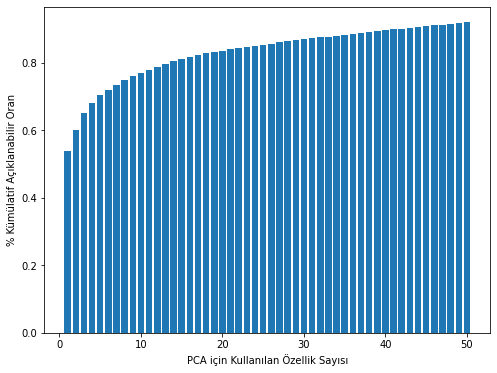

In [ ]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,51), cum_exp_var)
ax.set_xlabel('PCA için Kullanılan Özellik Sayısı')
ax.set_ylabel('% Kümülatif Açıklanabilir Oran');

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV

# **ÖRNEK BİR MODEL**

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(20,activation='relu'))
#model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,epochs=10)

Epoch 1/10
44/44 [==============================] - 2s 2ms/step - loss: 13.4701 - accuracy: 0.2999
Epoch 2/10
44/44 [==============================] - 0s 2ms/step - loss: 1.5697 - accuracy: 0.5685
Epoch 3/10
44/44 [==============================] - 0s 2ms/step - loss: 1.0149 - accuracy: 0.6408
Epoch 4/10
44/44 [==============================] - 0s 2ms/step - loss: 0.8365 - accuracy: 0.7070
Epoch 5/10
44/44 [==============================] - 0s 2ms/step - loss: 0.9554 - accuracy: 0.6846
Epoch 6/10
44/44 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.7675
Epoch 7/10
44/44 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7794
Epoch 8/10
44/44 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.7691
Epoch 9/10
44/44 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7690
Epoch 10/10
44/44 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7951


In [ ]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

11/11 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.7810

accuracy: 78.10%


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[3.6062714e-02, 7.0267998e-02, 2.3771967e-03, 8.9129204e-01],
       [7.5080681e-01, 6.8780845e-03, 2.3822470e-01, 4.0904866e-03],
       [2.9376060e-01, 6.5259218e-01, 1.2691782e-04, 5.3520337e-02],
       ...,
       [4.6374728e-03, 9.6711606e-01, 1.3219047e-02, 1.5027419e-02],
       [1.1729952e-05, 9.9385530e-03, 1.1125762e-07, 9.9004960e-01],
       [4.0644810e-01, 4.4255385e-01, 1.6413398e-02, 1.3458467e-01]],
      dtype=float32)

In [ ]:
# TODO: y_preddeki en baskın sınıfı getir, y_testi de tekli vektöre düşür sınıf başı accuracy vs bak

# GRID SEARCH İLE BEST PARAMETRE BULMA

In [ ]:
#batch_size = [10, 20, 40, 60, 80, 100]
#epochs = [25, 50, 80]
n_hidden = [1,2,3,4]
n_neurons = [50,100,150,200,250]
optimizer = ['RMSprop','Adam','SGD']

In [ ]:
param_distribs = dict(n_hidden=n_hidden, n_neurons=n_neurons, optimizer=optimizer)

# **MFCC 40**

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(4,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [ ]:
grd = GridSearchCV(keras_model,param_distribs,cv=4)
grd.fit(X_train,y_train)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
33/33 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9896
Epoch 77/80
33/33 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9926
Epoch 78/80
33/33 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.9914
Epoch 79/80
33/33 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.9893
Epoch 80/80
11/11 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8934
Epoch 1/80
33/33 [==============================] - 1s 3ms/step - loss: 8.8397 - accuracy: 0.2703
Epoch 2/80
33/33 [==============================] - 0s 4ms/step - loss: 1.1438 - accuracy: 0.5170
Epoch 3/80
33/33 [==============================] - 0s 4ms/step - loss: 0.9634 - accuracy: 0.6064
Epoch 4/80
33/33 [==============================] - 0s 4ms/step - loss: 0.7884 - accuracy: 0.6837
Epoch 5/80
33/33 [==============================] - 0s 3ms/step - loss: 0.9399

GridSearchCV(cv=4, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fca900da7d0>,
             iid='deprecated', n_jobs=None,
             param_grid={'epochs': [10, 25, 50, 80], 'n_hidden': [1, 2, 3, 4],
                         'n_neurons': [50, 100, 150, 200, 250],
                         'optimizer': ['RMSprop', 'Adam', 'SGD']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grd.best_params_)
print(grd.best_score_)

{'epochs': 80, 'n_hidden': 4, 'n_neurons': 150, 'optimizer': 'Adam'}
0.9063400626182556


In [ ]:
means = grd.cv_results_['mean_test_score']
stds = grd.cv_results_['std_test_score']
params = grd.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#reference: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [ ]:
mdl_mfcc = grd.best_estimator_

# **LPC MODEL**

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_lpc(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_lpc.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(4,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_lpc)
grd = GridSearchCV(keras_model,param_distribs, cv=4)
grd.fit(X_train_lpc,y_train_lpc,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
33/33 [==============================] - 0s 3ms/step - loss: 1.0090 - accuracy: 0.5160
Epoch 77/80
33/33 [==============================] - 0s 3ms/step - loss: 1.0201 - accuracy: 0.4957
Epoch 78/80
33/33 [==============================] - 0s 3ms/step - loss: 1.0678 - accuracy: 0.4672
Epoch 79/80
33/33 [==============================] - 0s 3ms/step - loss: 1.0395 - accuracy: 0.4920
Epoch 80/80
11/11 [==============================] - 0s 2ms/step - loss: 1.0977 - accuracy: 0.4813
Epoch 1/80
33/33 [==============================] - 1s 3ms/step - loss: 1.3869 - accuracy: 0.2787
Epoch 2/80
33/33 [==============================] - 0s 3ms/step - loss: 1.3669 - accuracy: 0.3092
Epoch 3/80
33/33 [==============================] - 0s 4ms/step - loss: 1.3581 - accuracy: 0.3297
Epoch 4/80
33/33 [==============================] - 0s 3ms/step - loss: 1.3335 - accuracy: 0.3744
Epoch 5/80
33/33 [==============================] - 0s 3ms/step - loss: 1.3143

GridSearchCV(cv=4, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fac4f73dd10>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_hidden': [1, 2, 3, 4],
                         'n_neurons': [50, 100, 150, 200, 250],
                         'optimizer': ['RMSprop', 'Adam', 'SGD']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grd.best_params_)
print(grd.best_score_)

{'n_hidden': 4, 'n_neurons': 250, 'optimizer': 'Adam'}
0.505043238401413


In [ ]:
mdl_lpc = grd.best_estimator_

In [ ]:
means = grd.cv_results_['mean_test_score']
stds = grd.cv_results_['std_test_score']
params = grd.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#reference: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

0.358060 (0.058771) with: {'n_hidden': 1, 'n_neurons': 50, 'optimizer': 'RMSprop'}
0.344358 (0.054413) with: {'n_hidden': 1, 'n_neurons': 50, 'optimizer': 'Adam'}
0.326432 (0.062042) with: {'n_hidden': 1, 'n_neurons': 50, 'optimizer': 'SGD'}
0.355975 (0.067221) with: {'n_hidden': 1, 'n_neurons': 100, 'optimizer': 'RMSprop'}
0.354539 (0.065492) with: {'n_hidden': 1, 'n_neurons': 100, 'optimizer': 'Adam'}
0.337937 (0.075833) with: {'n_hidden': 1, 'n_neurons': 100, 'optimizer': 'SGD'}
0.390531 (0.045333) with: {'n_hidden': 1, 'n_neurons': 150, 'optimizer': 'RMSprop'}
0.345147 (0.050318) with: {'n_hidden': 1, 'n_neurons': 150, 'optimizer': 'Adam'}
0.303371 (0.044732) with: {'n_hidden': 1, 'n_neurons': 150, 'optimizer': 'SGD'}
0.409243 (0.031202) with: {'n_hidden': 1, 'n_neurons': 200, 'optimizer': 'RMSprop'}
0.405594 (0.042224) with: {'n_hidden': 1, 'n_neurons': 200, 'optimizer': 'Adam'}
0.317708 (0.013930) with: {'n_hidden': 1, 'n_neurons': 200, 'optimizer': 'SGD'}
0.378999 (0.063319) wit

# **LFCC model**

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_lfcc(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_lfcc.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(4,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_lfcc)
grd = GridSearchCV(keras_model,param_distribs,cv=4)
grd.fit(X_train_lfcc,y_train_lfcc,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
33/33 [==============================] - 0s 4ms/step - loss: 1.3645 - accuracy: 0.3440
Epoch 77/80
33/33 [==============================] - 0s 4ms/step - loss: 1.3673 - accuracy: 0.3221
Epoch 78/80
33/33 [==============================] - 0s 3ms/step - loss: 1.3727 - accuracy: 0.3081
Epoch 79/80
33/33 [==============================] - 0s 3ms/step - loss: 1.3808 - accuracy: 0.3014
Epoch 80/80
11/11 [==============================] - 0s 4ms/step - loss: 1.3935 - accuracy: 0.2248
Epoch 1/80
33/33 [==============================] - 1s 3ms/step - loss: 1.3823 - accuracy: 0.2587
Epoch 2/80
33/33 [==============================] - 0s 3ms/step - loss: 1.3754 - accuracy: 0.2706
Epoch 3/80
33/33 [==============================] - 0s 3ms/step - loss: 1.3716 - accuracy: 0.3142
Epoch 4/80
33/33 [==============================] - 0s 3ms/step - loss: 1.3737 - accuracy: 0.2910
Epoch 5/80
33/33 [==============================] - 0s 3ms/step - loss: 1.3774

GridSearchCV(cv=4, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fabe4469510>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_hidden': [1, 2, 3, 4],
                         'n_neurons': [50, 100, 150, 200, 250],
                         'optimizer': ['RMSprop', 'Adam', 'SGD']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grd.best_params_)
print(grd.best_score_)

{'n_hidden': 3, 'n_neurons': 100, 'optimizer': 'RMSprop'}
0.26440922170877457


In [ ]:
mdl_lfcc = grd.best_estimator_

In [ ]:
means = grd.cv_results_['mean_test_score']
stds = grd.cv_results_['std_test_score']
params = grd.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#reference: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

0.265127 (0.021424) with: {'n_hidden': 1, 'n_neurons': 50, 'optimizer': 'RMSprop'}
0.268737 (0.026117) with: {'n_hidden': 1, 'n_neurons': 50, 'optimizer': 'Adam'}
0.270883 (0.026201) with: {'n_hidden': 1, 'n_neurons': 50, 'optimizer': 'SGD'}
0.265127 (0.021424) with: {'n_hidden': 1, 'n_neurons': 100, 'optimizer': 'RMSprop'}
0.268737 (0.026117) with: {'n_hidden': 1, 'n_neurons': 100, 'optimizer': 'Adam'}
0.271602 (0.026602) with: {'n_hidden': 1, 'n_neurons': 100, 'optimizer': 'SGD'}
0.268737 (0.026117) with: {'n_hidden': 1, 'n_neurons': 150, 'optimizer': 'RMSprop'}
0.265127 (0.021424) with: {'n_hidden': 1, 'n_neurons': 150, 'optimizer': 'Adam'}
0.265847 (0.022101) with: {'n_hidden': 1, 'n_neurons': 150, 'optimizer': 'SGD'}
0.270883 (0.026201) with: {'n_hidden': 1, 'n_neurons': 200, 'optimizer': 'RMSprop'}
0.265127 (0.021424) with: {'n_hidden': 1, 'n_neurons': 200, 'optimizer': 'Adam'}
0.265847 (0.022101) with: {'n_hidden': 1, 'n_neurons': 200, 'optimizer': 'SGD'}
0.274493 (0.029463) wit

# **MEL SPECTROGRAM model**

In [ ]:
#X_train_mel_pca, X_test_mel_pca, y_train_mel_pca, y_test_mel_pca = train_test_split(X_mel_pca, y_new, test_size=0.2, random_state=5)

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_mel_pca(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_mel_pca.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(4,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_mel_pca)
grd = GridSearchCV(keras_model,param_distribs)
grd.fit(X_train_mel_pca,y_train_mel_pca,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
35/35 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9714
Epoch 77/80
35/35 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9734
Epoch 78/80
35/35 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9897
Epoch 79/80
35/35 [==============================] - 0s 4ms/step - loss: 0.0618 - accuracy: 0.9805
Epoch 80/80
9/9 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9025
Epoch 1/80
35/35 [==============================] - 1s 4ms/step - loss: 1.0992 - accuracy: 0.5430
Epoch 2/80
35/35 [==============================] - 0s 5ms/step - loss: 0.4916 - accuracy: 0.8189
Epoch 3/80
35/35 [==============================] - 0s 4ms/step - loss: 0.3889 - accuracy: 0.8614
Epoch 4/80
35/35 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.8858
Epoch 5/80
35/35 [==============================] - 0s 4ms/step - loss: 0.2210 -

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f3f8e1976d0>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_hidden': [1, 2, 3, 4],
                         'n_neurons': [50, 100, 150, 200, 250],
                         'optimizer': ['RMSprop', 'Adam', 'SGD']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grd.best_params_)
print(grd.best_score_)

{'n_hidden': 3, 'n_neurons': 200, 'optimizer': 'RMSprop'}
0.9070695757865905


In [ ]:
mdl_mel = grd.best_estimator_

In [ ]:
means = grd.cv_results_['mean_test_score']
stds = grd.cv_results_['std_test_score']


params = grd.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#reference: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

# **PLP model**

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_plp(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_plp.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(4,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_plp)
grd = GridSearchCV(keras_model,param_distribs)
grd.fit(X_train_plp,y_train_plp,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
35/35 [==============================] - 0s 2ms/step - loss: 1.1270 - accuracy: 0.4974
Epoch 77/80
35/35 [==============================] - 0s 3ms/step - loss: 1.1166 - accuracy: 0.4998
Epoch 78/80
35/35 [==============================] - 0s 2ms/step - loss: 1.0880 - accuracy: 0.5133
Epoch 79/80
35/35 [==============================] - 0s 3ms/step - loss: 1.0740 - accuracy: 0.5167
Epoch 80/80
9/9 [==============================] - 0s 2ms/step - loss: 1.0514 - accuracy: 0.5451
Epoch 1/80
35/35 [==============================] - 1s 4ms/step - loss: 1.3891 - accuracy: 0.2930
Epoch 2/80
35/35 [==============================] - 0s 3ms/step - loss: 1.3049 - accuracy: 0.3973
Epoch 3/80
35/35 [==============================] - 0s 3ms/step - loss: 1.2013 - accuracy: 0.4538
Epoch 4/80
35/35 [==============================] - 0s 3ms/step - loss: 1.1194 - accuracy: 0.5096
Epoch 5/80
35/35 [==============================] - 0s 3ms/step - loss: 1.1198 -

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fca274ccf50>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_hidden': [1, 2, 3, 4],
                         'n_neurons': [50, 100, 150, 200, 250],
                         'optimizer': ['RMSprop', 'Adam', 'SGD']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grd.best_params_)
print(grd.best_score_)

{'n_hidden': 3, 'n_neurons': 250, 'optimizer': 'Adam'}
0.8025790333747864


In [ ]:
mdl_plp = grd.best_estimator_

In [ ]:
means = grd.cv_results_['mean_test_score']
stds = grd.cv_results_['std_test_score']
params = grd.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#reference: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

0.483432 (0.033355) with: {'n_hidden': 1, 'n_neurons': 50, 'optimizer': 'RMSprop'}
0.477674 (0.036945) with: {'n_hidden': 1, 'n_neurons': 50, 'optimizer': 'Adam'}
0.373893 (0.049413) with: {'n_hidden': 1, 'n_neurons': 50, 'optimizer': 'SGD'}
0.491346 (0.021752) with: {'n_hidden': 1, 'n_neurons': 100, 'optimizer': 'RMSprop'}
0.504324 (0.014990) with: {'n_hidden': 1, 'n_neurons': 100, 'optimizer': 'Adam'}
0.403434 (0.039813) with: {'n_hidden': 1, 'n_neurons': 100, 'optimizer': 'SGD'}
0.517295 (0.029479) with: {'n_hidden': 1, 'n_neurons': 150, 'optimizer': 'RMSprop'}
0.512983 (0.024370) with: {'n_hidden': 1, 'n_neurons': 150, 'optimizer': 'Adam'}
0.401254 (0.068257) with: {'n_hidden': 1, 'n_neurons': 150, 'optimizer': 'SGD'}
0.533140 (0.039218) with: {'n_hidden': 1, 'n_neurons': 200, 'optimizer': 'RMSprop'}
0.525242 (0.021442) with: {'n_hidden': 1, 'n_neurons': 200, 'optimizer': 'Adam'}
0.387593 (0.044386) with: {'n_hidden': 1, 'n_neurons': 200, 'optimizer': 'SGD'}
0.538184 (0.020425) wit

# **PLP RASTA MODEL**

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_plp_rasta(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_plp_rasta.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(4,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_plp)
grd = GridSearchCV(keras_model,param_distribs)
grd.fit(X_train_plp_rasta,y_train_plp_rasta,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
35/35 [==============================] - 0s 3ms/step - loss: 1.3683 - accuracy: 0.3713
Epoch 77/80
35/35 [==============================] - 0s 4ms/step - loss: 1.3658 - accuracy: 0.3582
Epoch 78/80
35/35 [==============================] - 0s 4ms/step - loss: 1.3779 - accuracy: 0.3577
Epoch 79/80
35/35 [==============================] - 0s 2ms/step - loss: 1.3726 - accuracy: 0.3678
Epoch 80/80
9/9 [==============================] - 0s 2ms/step - loss: 1.3650 - accuracy: 0.3791
Epoch 1/80
35/35 [==============================] - 1s 3ms/step - loss: 1.3843 - accuracy: 0.2674
Epoch 2/80
35/35 [==============================] - 0s 3ms/step - loss: 1.3716 - accuracy: 0.3167
Epoch 3/80
35/35 [==============================] - 0s 4ms/step - loss: 1.3608 - accuracy: 0.3481
Epoch 4/80
35/35 [==============================] - 0s 4ms/step - loss: 1.3512 - accuracy: 0.3270
Epoch 5/80
35/35 [==============================] - 0s 4ms/step - loss: 1.3201 -

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fca235e2bd0>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_hidden': [1, 2, 3, 4],
                         'n_neurons': [50, 100, 150, 200, 250],
                         'optimizer': ['RMSprop', 'Adam', 'SGD']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grd.best_params_)
print(grd.best_score_)

{'n_hidden': 3, 'n_neurons': 200, 'optimizer': 'Adam'}
0.5468171238899231


In [ ]:
means = grd.cv_results_['mean_test_score']
stds = grd.cv_results_['std_test_score']
params = grd.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#reference: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

# All Features Model

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_all(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_all.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(4,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_all)
grd = GridSearchCV(keras_model,param_distribs)
grd.fit(X_train_all,y_train_plp_rasta,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
35/35 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 77/80
35/35 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 78/80
35/35 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 79/80
35/35 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 80/80
9/9 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.9170
Epoch 1/80
35/35 [==============================] - 1s 8ms/step - loss: 1.1413 - accuracy: 0.5070
Epoch 2/80
35/35 [==============================] - 0s 8ms/step - loss: 0.4806 - accuracy: 0.8481
Epoch 3/80
35/35 [==============================] - 0s 9ms/step - loss: 0.2699 - accuracy: 0.9156
Epoch 4/80
35/35 [==============================] - 0s 8ms/step - loss: 0.1703 - accuracy: 0.9375
Epoch 5/80
35/35 [==============================] - 0s 8ms/step - loss: 0.2051 -

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f3f8c4a2850>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_hidden': [1, 2, 3, 4],
                         'n_neurons': [50, 100, 150, 200, 250],
                         'optimizer': ['RMSprop', 'Adam', 'SGD']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grd.best_params_)
print(grd.best_score_)

{'n_hidden': 1, 'n_neurons': 100, 'optimizer': 'Adam'}
0.922200870513916


## Evaluation Ufak değerlendirme

--turev db için **textblob tarzı türkçe bir polarity** ile desteklenmeli (ex: fırıldak kelimesinin üzgün hali öyle çok da üzgün değil)
	--kelime oldukları için ingilizceye çevirip oradan polarite alınabilir
-- **sinirlileri genel olarak erkek okumuş gerisini kız**, standartlık yok (sinirli kadın?)
--bazı duygular öyle çok da çıkmıyor
--bazı kayıtlar 0.2 saniye sonra konuşmaya başlıyor bazısı hemen bam dalıyor o nedenle *temizleme yapılabilecek gibi değil*(*sınıf sınıf bakmak gerekebilir*, belki sinirlide 0.3 sn sonra başlayıp üzgünde direkt dalıyordur?)

--mel spectrogram mfccden daha düşük başarı veriyor

# **TURES DATASET**

# Drivedan yükle

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#download3 = drive.CreateFile({'id': '15YZRe14up8mRKpqn7eOqmcGKWV5DczPs'})
#download3.GetContentFile('opensmile_a.arff')


# Dataframe oluştur

In [ ]:
!pip install liac-arff

  Created wheel for liac-arff: filename=liac_arff-2.5.0-cp37-none-any.whl size=11732 sha256=bd93f92b97a591078d1455f8204c5e13b54b2e630018f7eecbe5ccb82cb5aa6f
  Stored in directory: /root/.cache/pip/wheels/77/8d/b4/8bfce5beea9a3496cc15b24961876adb7b6e2912ff09164179
Successfully built liac-arff


In [ ]:
import arff, numpy as np
dataset_a = arff.load(open('/content/drive/MyDrive/tures_db_2014_pub/tures_db_2014_pub/opensmile_a.arff', 'r'))
#dataset_d = arff.load(open('/content/drive/MyDrive/tures_db_2014_pub/tures_db_2014_pub/opensmile_d.arff', 'r'))
#dataset_v = arff.load(open('/content/drive/MyDrive/tures_db_2014_pub/tures_db_2014_pub/opensmile_v.arff', 'r'))

In [ ]:
df_a = pd.DataFrame(np.array(dataset_a['data']))

In [ ]:
df_a

0         1     2      3     ...      6667      6668   6669     6670
0       MO1-1   8.57406  23.0  195.0  ...  76350.42  84.49925  238.0  -0.0741
1       MO1-2  7.057554  15.0    4.0  ...  70207.45  119.6975  122.0  -0.1852
2       MO1-3  9.571346  57.0    3.0  ...  85907.55  95.96777  101.0  -0.2407
3       MO1-4  8.142796  30.0    6.0  ...  27780.02  23.83341  116.0  -0.0556
4       MO1-8  8.076541  21.0   75.0  ...  53709.12  66.75137  297.0  -0.3889
...       ...       ...   ...    ...  ...       ...       ...    ...      ...
5095  MO58-94  10.74837  69.0    0.0  ...  53611.94  69.36386  190.0  -0.2037
5096  MO58-95  9.799479  59.0  213.0  ...  44887.06  57.34202  218.0  -0.2222
5097  MO58-96  9.137165  63.0   12.0  ...  53762.43  63.67924  188.0  -0.2593
5098  MO58-97  9.547691  52.0  173.0  ...  69529.12  68.17675  174.0  -0.1296
5099  MO58-99  7.852557  49.0  259.0  ...  26915.56  28.55661  270.0  -0.2593

[5100 rows x 6671 columns]

In [ ]:
import gc
del dataset_a
gc.collect()

53

In [ ]:
df_cat = pd.read_csv('/content/drive/MyDrive/tures_db_2014_pub/tures_db_2014_pub/cat.csv')

In [ ]:
import imblearn
print(imblearn.__version__)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df_cat[['emotion_lab','emotion_num']].drop_duplicates()

emotion_lab  emotion_num
0         Happy            3
1       Neutral            1
2          Fear            6
7         Angry            5
14          Sad            2
17    Surprised            4
104       Other            7

In [ ]:
df_cat.emotion_lab.value_counts()

Neutral      2150
Angry        1377
Sad           567
Happy         404
Surprised     379
Other         127
Fear           96
Name: emotion_lab, dtype: int64

In [ ]:
df_a['emotion'] = df_cat.emotion_num

In [ ]:
df_a[(df_a.emotion != 6 )& (df_a.emotion != 7)]

0         1     2      3  ...      6668   6669     6670 emotion
0       MO1-1   8.57406  23.0  195.0  ...  84.49925  238.0  -0.0741       3
1       MO1-2  7.057554  15.0    4.0  ...  119.6975  122.0  -0.1852       1
3       MO1-4  8.142796  30.0    6.0  ...  23.83341  116.0  -0.0556       1
4       MO1-8  8.076541  21.0   75.0  ...  66.75137  297.0  -0.3889       1
5       MO1-9  10.54847   9.0  175.0  ...  35.94328  176.0  -0.2222       1
...       ...       ...   ...    ...  ...       ...    ...      ...     ...
5095  MO58-94  10.74837  69.0    0.0  ...  69.36386  190.0  -0.2037       1
5096  MO58-95  9.799479  59.0  213.0  ...  57.34202  218.0  -0.2222       1
5097  MO58-96  9.137165  63.0   12.0  ...  63.67924  188.0  -0.2593       3
5098  MO58-97  9.547691  52.0  173.0  ...  68.17675  174.0  -0.1296       1
5099  MO58-99  7.852557  49.0  259.0  ...  28.55661  270.0  -0.2593       5

[4877 rows x 6672 columns]

# FEAR VE DİĞERLERİNİN ATILMASI

In [ ]:
df_a = df_a[(df_a.emotion != 6 )& (df_a.emotion != 7)]

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
df_a

0         1     2      3  ...      6668   6669     6670 emotion
0       MO1-1   8.57406  23.0  195.0  ...  84.49925  238.0  -0.0741       3
1       MO1-2  7.057554  15.0    4.0  ...  119.6975  122.0  -0.1852       1
3       MO1-4  8.142796  30.0    6.0  ...  23.83341  116.0  -0.0556       1
4       MO1-8  8.076541  21.0   75.0  ...  66.75137  297.0  -0.3889       1
5       MO1-9  10.54847   9.0  175.0  ...  35.94328  176.0  -0.2222       1
...       ...       ...   ...    ...  ...       ...    ...      ...     ...
5095  MO58-94  10.74837  69.0    0.0  ...  69.36386  190.0  -0.2037       1
5096  MO58-95  9.799479  59.0  213.0  ...  57.34202  218.0  -0.2222       1
5097  MO58-96  9.137165  63.0   12.0  ...  63.67924  188.0  -0.2593       3
5098  MO58-97  9.547691  52.0  173.0  ...  68.17675  174.0  -0.1296       1
5099  MO58-99  7.852557  49.0  259.0  ...  28.55661  270.0  -0.2593       5

[4877 rows x 6672 columns]

# SMOTE

In [ ]:
y = df_a.emotion

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [ ]:
y

array([2, 0, 0, ..., 2, 0, 4])

In [ ]:
X_tures_smote = df_a.drop(columns=df_a.columns[0]).drop(columns=['emotion'])

In [ ]:
X_tures_smote

1     2      3         4     ...      6667      6668   6669     6670
0      8.57406  23.0  195.0  3.570084  ...  76350.42  84.49925  238.0  -0.0741
1     7.057554  15.0    4.0  3.373314  ...  70207.45  119.6975  122.0  -0.1852
3     8.142796  30.0    6.0   3.87747  ...  27780.02  23.83341  116.0  -0.0556
4     8.076541  21.0   75.0  3.345082  ...  53709.12  66.75137  297.0  -0.3889
5     10.54847   9.0  175.0   3.86236  ...  31464.51  35.94328  176.0  -0.2222
...        ...   ...    ...       ...  ...       ...       ...    ...      ...
5095  10.74837  69.0    0.0  6.384389  ...  53611.94  69.36386  190.0  -0.2037
5096  9.799479  59.0  213.0  4.219172  ...  44887.06  57.34202  218.0  -0.2222
5097  9.137165  63.0   12.0  3.607206  ...  53762.43  63.67924  188.0  -0.2593
5098  9.547691  52.0  173.0   5.59395  ...  69529.12  68.17675  174.0  -0.1296
5099  7.852557  49.0  259.0  3.124155  ...  26915.56  28.55661  270.0  -0.2593

[4877 rows x 6670 columns]

In [ ]:
oversample = SMOTE(random_state=5)
X_tures_smote, y = oversample.fit_resample(X_tures_smote, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
pd.DataFrame(y).value_counts()

5    2150
4    2150
3    2150
2    2150
1    2150
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
X_tures_smote_pca = scaler.fit_transform(X_tures_smote)

In [ ]:
scaler = StandardScaler()
X_tures_pca = scaler.fit_transform(df_a.drop(columns=df_a.columns[0]).drop(columns=['emotion']))

In [ ]:
pca = PCA(n_components=510)
pca.fit(X_tures_pca)
X_tures_pca = pca.transform(X_tures_pca)

# PCA & SCALING

In [ ]:
pca = PCA(n_components=6670)
pca.fit(X_tures_smote_pca)
X_pca = pca.transform(X_tures_smote_pca)

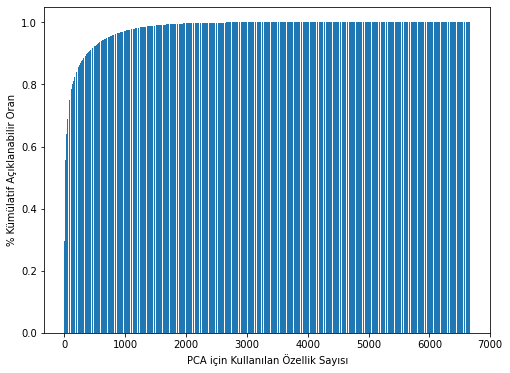

In [ ]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,6671), cum_exp_var)
ax.set_xlabel('PCA için Kullanılan Özellik Sayısı')
ax.set_ylabel('% Kümülatif Açıklanabilir Oran');

In [ ]:
pca = PCA(n_components=510)
pca.fit(X_tures_smote_pca)
X_tures_smote_pca = pca.transform(X_tures_smote_pca)

In [ ]:
X_tures_smote_pca.shape

(10750, 510)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
#batch_size = [10, 20, 40, 60, 80, 100]
#epochs = [25, 50, 80]
n_hidden = [1,2,3,4]
n_neurons = [50,100,150,200,250]
optimizer = ['RMSprop','Adam','SGD']

In [ ]:
param_distribs = dict(n_hidden=n_hidden, n_neurons=n_neurons, optimizer=optimizer)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Tures Default Model

In [ ]:
lb = LabelEncoder()
y_new_tures = np_utils.to_categorical(lb.fit_transform(np.ravel(df_a.emotion)))

In [ ]:
y_new_tures.shape

(4877, 5)

In [ ]:
X_train_tures, X_test_tures, y_train_tures, y_test_tures = train_test_split(X_tures_pca, y_new_tures, test_size=0.2, random_state=5)

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_tures(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_tures.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(5,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_tures)

In [ ]:
rcv = RandomizedSearchCV(keras_model,param_distribs,cv=4)
rcv.fit(X_train_tures,y_train_tures,epochs=10)

Epoch 1/10
92/92 [==============================] - 1s 11ms/step - loss: 1.7995 - accuracy: 0.4557
Epoch 2/10
92/92 [==============================] - 1s 10ms/step - loss: 1.0914 - accuracy: 0.5978
Epoch 3/10
92/92 [==============================] - 1s 11ms/step - loss: 0.8956 - accuracy: 0.6675
Epoch 4/10
92/92 [==============================] - 1s 10ms/step - loss: 0.7716 - accuracy: 0.7174
Epoch 5/10
92/92 [==============================] - 1s 11ms/step - loss: 0.6752 - accuracy: 0.7585
Epoch 6/10
92/92 [==============================] - 1s 10ms/step - loss: 0.5964 - accuracy: 0.8052
Epoch 7/10
92/92 [==============================] - 1s 11ms/step - loss: 0.5550 - accuracy: 0.8195
Epoch 8/10
92/92 [==============================] - 1s 11ms/step - loss: 0.4560 - accuracy: 0.8583
Epoch 9/10
92/92 [==============================] - 1s 11ms/step - loss: 0.3943 - accuracy: 0.8940
Epoch 10/10
31/31 [==============================] - 0s 10ms/step - loss: 1.6339 - accuracy: 0.5338
Epoch 1/1

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f3f5e6bb490>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 200, 'n_hidden': 2}
0.549863651394844


In [ ]:
grd = GridSearchCV(keras_model,param_distribs,cv=4)
grd.fit(X_train_tures,y_train_tures,epochs=10)

Epoch 1/10
92/92 [==============================] - 1s 10ms/step - loss: 2.6225 - accuracy: 0.4123
Epoch 2/10
92/92 [==============================] - 1s 9ms/step - loss: 1.1479 - accuracy: 0.6137
Epoch 3/10
92/92 [==============================] - 1s 9ms/step - loss: 0.7652 - accuracy: 0.7328
Epoch 4/10
92/92 [==============================] - 1s 9ms/step - loss: 0.5256 - accuracy: 0.8288
Epoch 5/10
92/92 [==============================] - 1s 9ms/step - loss: 0.3816 - accuracy: 0.8845
Epoch 6/10
92/92 [==============================] - 1s 9ms/step - loss: 0.2736 - accuracy: 0.9313
Epoch 7/10
92/92 [==============================] - 1s 9ms/step - loss: 0.1769 - accuracy: 0.9667
Epoch 8/10
92/92 [==============================] - 1s 9ms/step - loss: 0.1220 - accuracy: 0.9855
Epoch 9/10
92/92 [==============================] - 1s 9ms/step - loss: 0.0776 - accuracy: 0.9946
Epoch 10/10
31/31 [==============================] - 0s 9ms/step - loss: 2.6940 - accuracy: 0.5072
Epoch 1/10
92/92 [

KeyboardInterrupt: ignored

In [ ]:
print(grd.best_params_)
print(grd.best_score_)

In [ ]:
mdl_tures = grd.best_estimator_

In [ ]:
grd = GridSearchCV(keras_model,param_distribs,cv=4)
grd.fit(X_train_tures,y_train_tures,epochs=80)

Epoch 1/80
92/92 [==============================] - 1s 9ms/step - loss: 2.6337 - accuracy: 0.3565
Epoch 2/80
92/92 [==============================] - 1s 9ms/step - loss: 1.1267 - accuracy: 0.6248
Epoch 3/80
92/92 [==============================] - 1s 9ms/step - loss: 0.7548 - accuracy: 0.7254
Epoch 4/80
92/92 [==============================] - 1s 9ms/step - loss: 0.5309 - accuracy: 0.8233
Epoch 5/80
92/92 [==============================] - 1s 9ms/step - loss: 0.3917 - accuracy: 0.8822
Epoch 6/80
92/92 [==============================] - 1s 10ms/step - loss: 0.2818 - accuracy: 0.9327
Epoch 7/80
92/92 [==============================] - 1s 9ms/step - loss: 0.1991 - accuracy: 0.9637
Epoch 8/80
92/92 [==============================] - 1s 9ms/step - loss: 0.1370 - accuracy: 0.9824
Epoch 9/80
92/92 [==============================] - 1s 9ms/step - loss: 0.0911 - accuracy: 0.9940
Epoch 10/80
92/92 [==============================] - 1s 9ms/step - loss: 0.0585 - accuracy: 0.9979
Epoch 11/80
92/92 

KeyboardInterrupt: ignored

In [ ]:
print(grd.best_params_)
print(grd.best_score_)

In [ ]:
rcv = RandomizedSearchCV(keras_model,param_distribs,cv=4)
rcv.fit(X_train_tures,y_train_tures,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
92/92 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 77/80
92/92 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 78/80
92/92 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 79/80
92/92 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 80/80
31/31 [==============================] - 0s 10ms/step - loss: 3.2641 - accuracy: 0.5128
Epoch 1/80
92/92 [==============================] - 1s 10ms/step - loss: 1.5691 - accuracy: 0.4289
Epoch 2/80
92/92 [==============================] - 1s 10ms/step - loss: 1.2050 - accuracy: 0.5537
Epoch 3/80
92/92 [==============================] - 1s 10ms/step - loss: 1.0659 - accuracy: 0.6030
Epoch 4/80
92/92 [==============================] - 1s 10ms/step - loss: 0.9929 - accuracy: 0.6131
Epoch 5/80
92/92 [==============================] - 1s 10ms/step - lo

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f3f5e6bb490>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'Adam', 'n_neurons': 250, 'n_hidden': 2}
0.5457621365785599


# SMOTE + PCA

In [ ]:
lb = LabelEncoder()
y_new_tures_smote = np_utils.to_categorical(lb.fit_transform(np.ravel(y)))

In [ ]:
y_new_tures_smote.shape

(4877, 5)

In [ ]:
X_train_tures_smote, X_test_tures_smote, y_train_tures_smote, y_test_tures_smote = train_test_split(X_tures_smote_pca, y_new_tures_smote, test_size=0.2, random_state=5)

In [ ]:
X_train_tures_smote.shape

(8600, 510)

In [ ]:
X_tures_smote_pca.shape

(10750, 510)

In [ ]:
# TODO: GRID SEARCH ile best parametre 
def build_model_tures_smote(n_hidden=1,n_neurons=50,optimizer='RMSprop'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train_tures_smote.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
        #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(5,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_model_tures_smote)

In [ ]:
X_train_tures_smote.shape

(3901, 510)

In [ ]:
rcv = RandomizedSearchCV(keras_model,param_distribs,cv=4)
rcv.fit(X_train_tures_smote,y_train_tures_smote,epochs=10)

Epoch 1/10
202/202 [==============================] - 3s 11ms/step - loss: 1.5598 - accuracy: 0.3572
Epoch 2/10
202/202 [==============================] - 2s 11ms/step - loss: 1.0262 - accuracy: 0.6209
Epoch 3/10
202/202 [==============================] - 2s 11ms/step - loss: 0.7795 - accuracy: 0.7354
Epoch 4/10
202/202 [==============================] - 2s 11ms/step - loss: 0.5675 - accuracy: 0.8091
Epoch 5/10
202/202 [==============================] - 2s 11ms/step - loss: 0.4018 - accuracy: 0.8783
Epoch 6/10
202/202 [==============================] - 2s 12ms/step - loss: 0.2769 - accuracy: 0.9257
Epoch 7/10
202/202 [==============================] - 2s 11ms/step - loss: 0.1938 - accuracy: 0.9555
Epoch 8/10
202/202 [==============================] - 2s 11ms/step - loss: 0.1301 - accuracy: 0.9775
Epoch 9/10
202/202 [==============================] - 2s 11ms/step - loss: 0.0849 - accuracy: 0.9878
Epoch 10/10
68/68 [==============================] - 1s 10ms/step - loss: 0.6500 - accuracy

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f3f5e6bb490>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [50, 100, 150, 200, 250],
                                        'optimizer': ['RMSprop', 'Adam',
                                                      'SGD']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'RMSprop', 'n_neurons': 250, 'n_hidden': 2}
0.8433720916509628


In [ ]:
rcv = RandomizedSearchCV(keras_model,param_distribs,cv=4)
rcv.fit(X_train_tures_smote,y_train_tures_smote,epochs=80)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'optimizer': 'SGD', 'n_neurons': 250, 'n_hidden': 2}
0.5383238792419434


In [ ]:
grd = GridSearchCV(keras_model,param_distribs,cv=4)
grd.fit(X_train_tures_smote,y_train_tures_smote,epochs=10)

Epoch 1/10
92/92 [==============================] - 1s 10ms/step - loss: 2.7169 - accuracy: 0.3764
Epoch 2/10
92/92 [==============================] - 1s 10ms/step - loss: 1.1702 - accuracy: 0.6227
Epoch 3/10
92/92 [==============================] - 1s 10ms/step - loss: 0.7576 - accuracy: 0.7444
Epoch 4/10
92/92 [==============================] - 1s 10ms/step - loss: 0.5177 - accuracy: 0.8390
Epoch 5/10
92/92 [==============================] - 1s 10ms/step - loss: 0.3585 - accuracy: 0.8868
Epoch 6/10
92/92 [==============================] - 1s 10ms/step - loss: 0.2587 - accuracy: 0.9319
Epoch 7/10
92/92 [==============================] - 1s 10ms/step - loss: 0.1842 - accuracy: 0.9683
Epoch 8/10
92/92 [==============================] - 1s 10ms/step - loss: 0.1203 - accuracy: 0.9859
Epoch 9/10
92/92 [==============================] - 1s 10ms/step - loss: 0.0743 - accuracy: 0.9960
Epoch 10/10
31/31 [==============================] - 0s 9ms/step - loss: 2.6832 - accuracy: 0.5184
Epoch 1/10

KeyboardInterrupt: ignored

In [ ]:
print(grd.best_params_)
print(grd.best_score_)

In [ ]:
X_train_tures_smote.shape

(8600, 510)

In [ ]:
grd = GridSearchCV(keras_model,param_distribs,cv=4)
grd.fit(X_train_tures_smote,y_train_tures_smote,epochs=80)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
202/202 [==============================] - 1s 5ms/step - loss: 1.2692e-07 - accuracy: 1.0000
Epoch 77/80
202/202 [==============================] - 1s 6ms/step - loss: 1.1589e-07 - accuracy: 1.0000
Epoch 78/80
202/202 [==============================] - 1s 7ms/step - loss: 1.0374e-07 - accuracy: 1.0000
Epoch 79/80
202/202 [==============================] - 1s 5ms/step - loss: 9.5367e-08 - accuracy: 1.0000
Epoch 80/80
68/68 [==============================] - 0s 2ms/step - loss: 2.0758 - accuracy: 0.8470
Epoch 1/80
202/202 [==============================] - 2s 6ms/step - loss: 1.4004 - accuracy: 0.4496
Epoch 2/80
202/202 [==============================] - 1s 6ms/step - loss: 0.5233 - accuracy: 0.8097
Epoch 3/80
202/202 [==============================] - 1s 7ms/step - loss: 0.2275 - accuracy: 0.9223
Epoch 4/80
202/202 [==============================] - 1s 5ms/step - loss: 0.1155 - accuracy: 0.9648
Epoch 5/80
202/202 [==========================

GridSearchCV(cv=4, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd29bd49490>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_hidden': [1, 2, 3, 4],
                         'n_neurons': [50, 100, 150, 200, 250],
                         'optimizer': ['RMSprop', 'Adam', 'SGD']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grd.best_params_)
print(grd.best_score_)

{'n_hidden': 4, 'n_neurons': 250, 'optimizer': 'Adam'}
0.8559302389621735
